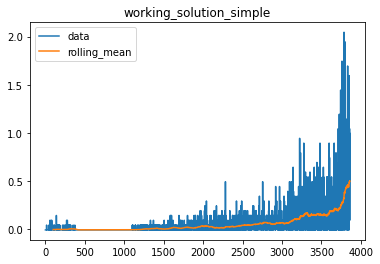

In [19]:
from utils import plot_result
plot_result('./working_solution_simple')

# tl;dr

The trained agent is able to solve the task after 3861 episodes. The agent is an adaptation of the DDPG Agent of project 2, modified to learn by self-play.

# Implementation.

For this project, I reused my implementation of a DDPG Agent, with some minor modifications. They hyper-parameters/design decisions are as follows:


- Batch size = 128.
- Theta parameter of OUNoise linearly annealed between 0.30 and 0.15.
- LR = 1e-3 for both actor and critic. Default ADAM optimizers options were used.
- The Actor NN has two layers of 256 and 128 units, with a BatchNorm layer for the outputs of the first layer. The output activation function is a tanh; intermediate layers use ReLU.
- The Critic NN has 1 layer of 256 units for the state which is concatenated with the action (dim =4). This concatenated layer is fed into a final layer of 128 units. Intermediate layers use ReLU.
- Gradient clipping was perfomed on the critic network, as proposed in Udacity's course.
- As opposed to Udacity's implementation of the OUNoise, np.random.randn was used to generate noise from a standard normal distribution. The reviewed implementation of OUNoise used random.random(), which generates values uniformly from the (0,1) range. This modifies the distribution of the noise and also allows negative values.
- The two agents share the experience replay buffer, actor and critic network. Crucially, the target networks were updated every 16 (as opposed to 4 in the previous project) time steps for stability purposes.

# Future ideas.
- One of my proposals would be to use PrioritizedReplay. At the beggining, I briefly reused my implementation from project 1 (navigation). However, it was not working and I removed it to simplify the code. 
- Additionally, we could also experiment with other approaches for multi-agent RL, including having different agents that share a critic but have different actor networks, as described in the [Multi-Agent Actor-Critic for Mixed
Cooperative-Competitive Environments](https://papers.nips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf) paper.